In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

In [5]:
df_train = pd.read_csv('D:\\Codes\\Projects\\Sentiment_Analysis\\train.csv', delimiter=';',names=['text','label'])
df_val = pd.read_csv('D:\\Codes\\Projects\\Sentiment_Analysis\\val.csv', delimiter=';',names=['text','label'])

In [6]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True, drop=True)

In [7]:
print("Shape of the DataFrame:", df.shape)
df.sample(5)

Shape of the DataFrame: (18000, 2)


,text,label
4111,i feel honored to wear usa on my back,joy
4789,i feel that entertainers as talented as willia...,joy
2028,i feel petty posting with my own complaints ri...,anger
14210,i underlined make you feel whenever i hear abo...,joy
12563,i dont even think i would be ready to be fuck ...,sadness


<Axes: xlabel='label', ylabel='count'>

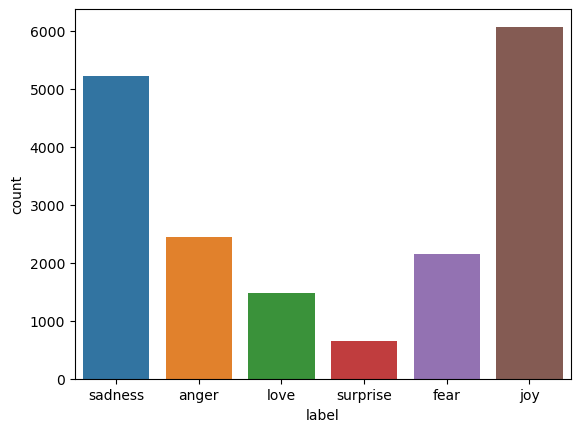

In [8]:
sns.countplot(x='label', data=df)

<Axes: xlabel='label', ylabel='count'>

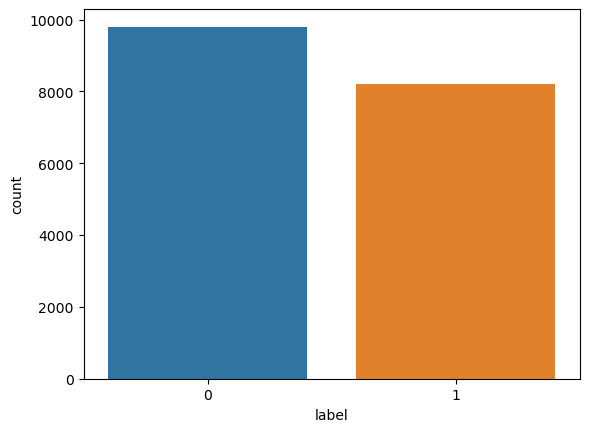

In [9]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
custom_encoder(df['label'])
sns.countplot(x = 'label',data = df)

In [10]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus = text_transformation(df['text'])

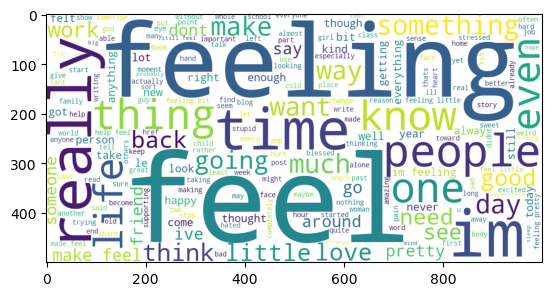

In [11]:
import matplotlib.pyplot as plt

#rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)


In [12]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

In [13]:
'''parameters = {'max_features': ('log','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}
'''

"parameters = {'max_features': ('log','sqrt'),\n             'n_estimators': [500, 1000, 1500],\n             'max_depth': [5, 10, None],\n             'min_samples_split': [5, 10, 15],\n             'min_samples_leaf': [1, 2, 5, 10],\n             'bootstrap': [True, False]}\n"

In [18]:
pip install xgboost


  Using cached xgboost-2.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.2-py3-none-win_amd64.whl (124.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X, y)


test_df = pd.read_csv('D:\\Codes\\Projects\\Sentiment_Analysis\\train.csv', delimiter=';',names=['text','label'])

X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = model.predict(testdata)

Accuracy_score:  0.9500625
Precision_score:  0.9711693253329431
Recall_score:  0.9168278529980658
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      8762
           1       0.97      0.92      0.94      7238

    accuracy                           0.95     16000
   macro avg       0.95      0.95      0.95     16000
weighted avg       0.95      0.95      0.95     16000



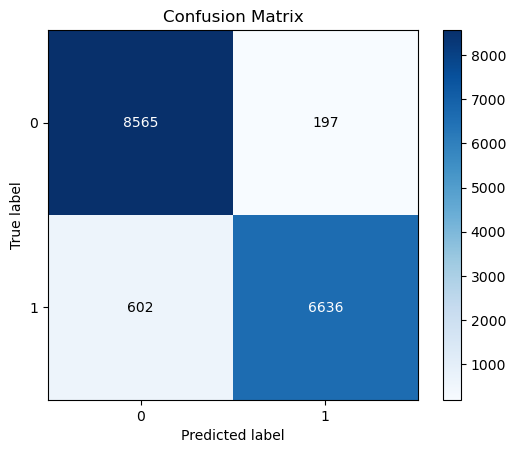

In [35]:

plot_confusion_matrix(y_test,predictions)

acc_score = accuracy_score(y_test,predictions)

pre_score = precision_score(y_test,predictions)

rec_score = recall_score(y_test,predictions)

print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)

print('Recall_score: ',rec_score)
print("-"*50)

cr = classification_report(y_test,predictions)
print(cr)